# Workbook 1 Song Popularity Project

### imports

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Acquire
Data was acquired from Kaggle https://www.kaggle.com/datasets/yasserh/song-popularity-dataset.
Original source is unknow but it is believed to come from spotify.

In [3]:
df = pd.read_csv('song_data.csv')

In [5]:
df.head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
5,Bring Me To Life,80,235893,0.008950,0.316,0.945,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.320
6,Last Resort,81,199893,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724
7,Are You Gonna Be My Girl,76,213800,0.001480,0.613,0.953,0.000582,2,0.1520,-3.435,1,0.0855,105.046,4,0.537
8,Mr. Brightside,80,222586,0.001080,0.330,0.936,0.000000,1,0.0926,-3.660,1,0.0917,148.112,4,0.234
9,Sex on Fire,81,203346,0.001720,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374


## Clean and Prep

In [7]:
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [13]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


Feature |Type |Description
 :--- | :--- | :--- |
song_name |object | The name of the song|
 song_popularity | int64|Song Popularity 0-100, The larger the number the more popular the song|
 song_duration_ms| int 64| how long the song is in miliseconds|
 acousticness|float 64|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic|
 danceability|float 64| how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable |
 energy|float 64|Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity|
 instrumentalness|float 64 | Predicts whether a track contains no vocals the closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
 key|int 64|The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.|
 liveness|float 64|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
 loudness|float 64|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db|
 audio_mode|int 64|Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
 speechiness|float 64|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.|
 tempo|float 64|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration|
 time_signature| int 64|
 audio_valence|float 64|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).|indicate how many beats are in each measure of a piece of music, as well as which note value is counted as a beat. |


In [12]:
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [10]:
df.columns.to_list()

['song_name',
 'song_popularity',
 'song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'audio_mode',
 'speechiness',
 'tempo',
 'time_signature',
 'audio_valence']

## Feature engineer

Notes:
* tempo as categories
* length of song
* Audio valance as categories
* loudness as categorical
* Key

# Split Data for Explore

In [14]:
def split_data(df):
    '''
    split_data takes in data Frame and splits into  train , validate, test.
    The split is 20% test 80% train/validate. Then 30% of 80% validate and 70% of 80% train.
    Aproximately (train 56%, validate 24%, test 20%)
    Returns train, validate, and test 
    '''
    # split test data from train/validate
    train_and_validate, test = train_test_split(df, random_state=123, test_size=.2)

    # split train from validate
    train, validate = train_test_split(train_and_validate, random_state=123, test_size=.3)
                                   
    return train, validate, test

In [17]:
train, _, _ = split_data(df)

In [18]:
train.shape

(10547, 15)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10547 entries, 1772 to 16297
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         10547 non-null  object 
 1   song_popularity   10547 non-null  int64  
 2   song_duration_ms  10547 non-null  int64  
 3   acousticness      10547 non-null  float64
 4   danceability      10547 non-null  float64
 5   energy            10547 non-null  float64
 6   instrumentalness  10547 non-null  float64
 7   key               10547 non-null  int64  
 8   liveness          10547 non-null  float64
 9   loudness          10547 non-null  float64
 10  audio_mode        10547 non-null  int64  
 11  speechiness       10547 non-null  float64
 12  tempo             10547 non-null  float64
 13  time_signature    10547 non-null  int64  
 14  audio_valence     10547 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.3+ MB


In [20]:
train.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,10547.000000,1.054700e+04,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000
mean,53.070921,2.187307e+05,0.255611,0.633564,0.646073,0.079530,5.323694,0.179647,-7.443154,0.629278,0.101337,120.839708,3.961032,0.526749
std,21.833123,6.093326e+04,0.288002,0.157318,0.214851,0.224102,3.627038,0.143709,3.841473,0.483021,0.103436,28.529705,0.285064,0.244761
min,0.000000,3.592000e+04,0.000001,0.062500,0.001070,0.000000,0.000000,0.011900,-38.768000,0.000000,0.022400,46.591000,0.000000,0.027700
25%,40.000000,1.851510e+05,0.023300,0.532500,0.510000,0.000000,2.000000,0.092500,-8.998500,0.000000,0.037800,98.221000,4.000000,0.334000
50%,56.000000,2.114660e+05,0.129000,0.644000,0.677000,0.000013,6.000000,0.122000,-6.542000,1.000000,0.055200,120.005000,4.000000,0.523000
75%,69.000000,2.427265e+05,0.416500,0.748000,0.817000,0.003010,8.000000,0.222000,-4.906000,1.000000,0.117000,139.649000,4.000000,0.721000
max,100.000000,1.799346e+06,0.996000,0.981000,0.997000,0.975000,11.000000,0.983000,0.878000,1.000000,0.941000,242.318000,5.000000,0.982000


In [21]:
def distribution( df, var):
    ''' distribution takes in a dataframe and variable and returns a histoplot 
    that  display the distirbution of the variable'''
    # use histplot
    sns.histplot(df[var])
    #show plot
    plt.show();

In [29]:
columns = train.columns.to_list()


In [30]:
columns.remove('song_name')

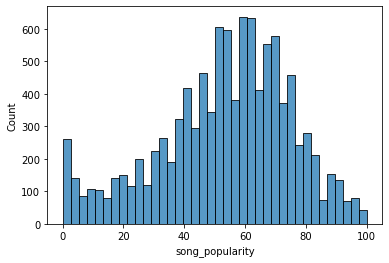

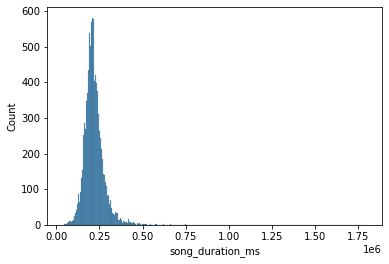

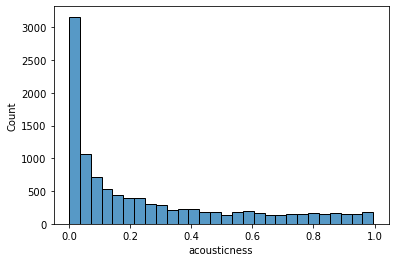

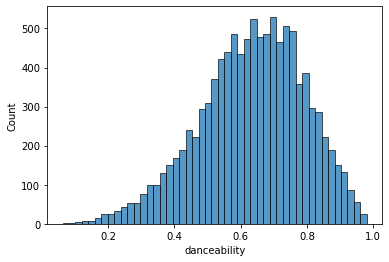

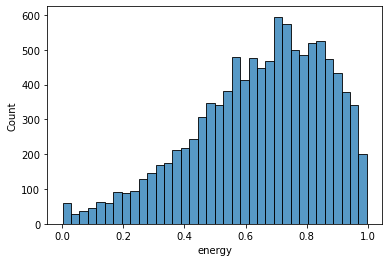

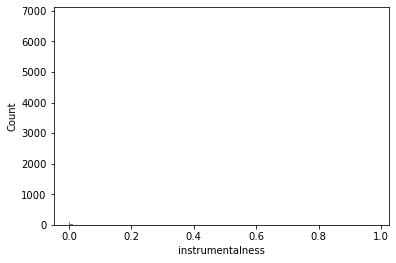

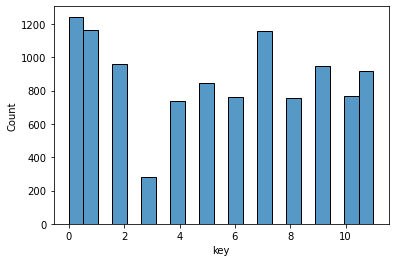

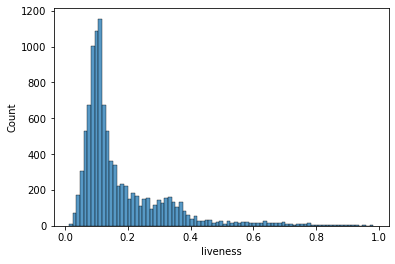

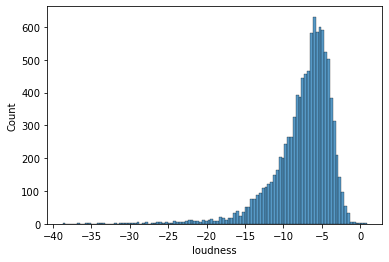

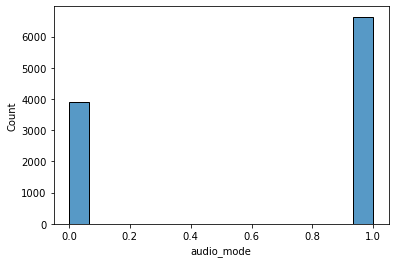

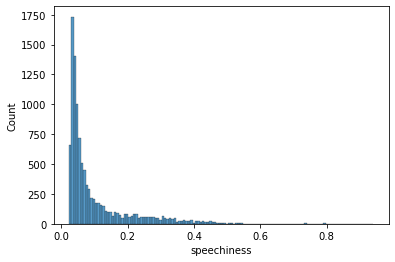

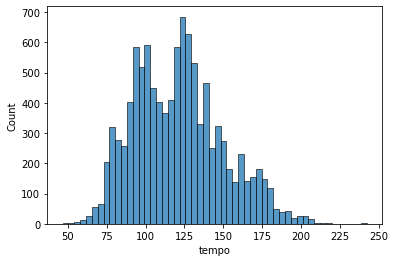

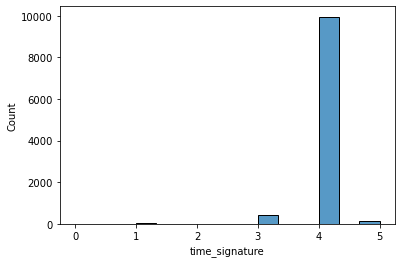

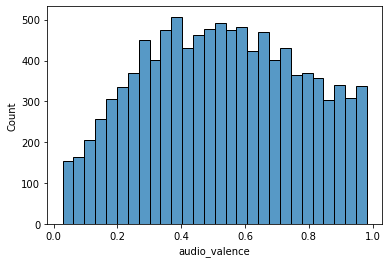

In [35]:
for col in columns:    
    distribution(train, col)

In [ ]:
sns.pairplot(train)